In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

import random

np.random.seed(1001)
random.seed(1001)

# Problem description
section 4.3 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 40
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, print_freq=10)

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=3610.0413003871913, L=-20000.0, U=-5.5385686111802475, L0=-20000.0
k=10, rel_gap=0.04601808513281746, L=-54.24901035143507, U=-51.862401924481865, L0=-54.24901035144685
k=20, rel_gap=5.07217366988555e-05, L=-53.62629906608818, U=-53.62357918502391, L0=-53.62629906608818
rho=16.137846511852082
rel_gap=2.336081277054689e-06, L=-53.626299065116314, U=-53.62617379001576


In [5]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-53.626299065116314, -53.62617379001576)

# Centralized solution

In [6]:
x_cvx, prob_cvx, h_cvx = ob.cvx_multi_commodity_flow(params=params)

In [7]:
h_cvx, prob.upper_bnd[-1]

(-53.62629906634274, -53.62617379001576)

# Plot

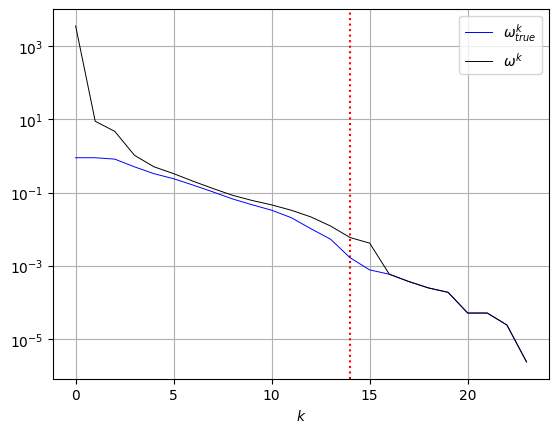

In [19]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='mc_osbdo.pdf')

i=13, omega_k=0.012186750581370002, omega_true=0.005323931444710603
i=14, omega_k=0.005892267977665978, omega_true=0.0016506641255965787
